# Prototype: sigma

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `ALL` |
| *Dataset* | `CICIDS2017` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `150.000`|
| *Adversarial Attack* | `FGSM & C&W & JSMA & PGD & DeepFool & BIM & Boundary & HSJ` |
| *Attack Type* | `Untargeted & Syntactic Correct` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect Adversarial Attacks and Misclassified Samples` |


---

## *Setup*

In [1]:
# To import modules from the functions directory
import sys
import os
# Get current directory of script or notebook
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Append parent directory (where "functions/" likely lives)
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)  # Make sure it's at the front

## Data Preprocessing

In [2]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
sample_size = 150000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset()

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=1503)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
-- Generating normalizer --
--- Splitting labels and features ---
Numeric Features: Index([], dtype='object')
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
Zero Columns: Index([' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Byte

## Split Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=302)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240000, 70) (60000, 70) (240000, 2) (60000, 2)


## Create IDS

In [4]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")

2025-07-24 16:08:06.815275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753366086.923385    4379 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753366086.953399    4379 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-24 16:08:07.226940: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


2025-07-24 16:08:09.531098: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 854us/step - accuracy: 0.9229 - loss: 0.1991 - val_accuracy: 0.9494 - val_loss: 0.1024
Epoch 2/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 832us/step - accuracy: 0.9606 - loss: 0.0992 - val_accuracy: 0.9592 - val_loss: 0.0870
Epoch 3/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 821us/step - accuracy: 0.9705 - loss: 0.0820 - val_accuracy: 0.9767 - val_loss: 0.0728
Epoch 4/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 838us/step - accuracy: 0.9754 - loss: 0.0704 - val_accuracy: 0.9779 - val_loss: 0.0702
Epoch 5/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 844us/step - accuracy: 0.9780 - loss: 0.0646 - val_accuracy: 0.9772 - val_loss: 0.0695
Epoch 6/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 832us/step - accuracy: 0.9796 - loss: 0.0610 - val_accuracy: 0.9769 - val_loss: 0.0689
Epoch 7/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 829us/step - accuracy: 0.9803 - loss: 0.0585 - val_accuracy: 0.9783 - val_loss: 0.0651
Epoch 8/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 810us/step - accuracy: 0.9809 - loss: 0.05

 150/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step


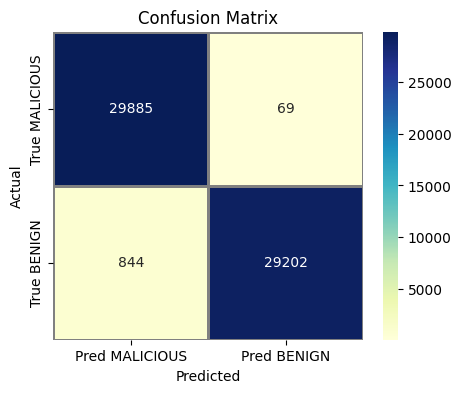

TN: 29885, FP: 69, FN: 844, TP: 29202


In [5]:
# store prediction from X_train
y_pred_test = ids.predict(ids_model, X_test, columns=y_train.columns)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_test_binary = np.array(y_test).argmin(axis=1)
y_pred_binary = np.array(y_pred_test).argmin(axis=1)
cm = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Pred MALICIOUS', 'Pred BENIGN'], yticklabels=['True MALICIOUS', 'True BENIGN'], linewidths=0.8, linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

## Generate Adversarial Attacks

In [5]:
import functions.attack_generator as ag
import importlib
importlib.reload(ag)

immutable_features = [
    ' Destination Port',
    ' Flow Duration',
    'Fwd PSH Flags',
    ' Fwd URG Flags',
    ' Fwd Header Length',
    ' Bwd Header Length',
    'FIN Flag Count',
    ' SYN Flag Count',
    ' RST Flag Count',
    ' PSH Flag Count',
    ' ACK Flag Count',
    ' URG Flag Count',
    ' CWE Flag Count',
    ' ECE Flag Count',
    ' Fwd Header Length.1',
    'Subflow Fwd Packets',
    ' Subflow Fwd Bytes',
    ' Subflow Bwd Packets',
    ' Subflow Bwd Bytes',
    'Init_Win_bytes_forward',
    ' Init_Win_bytes_backward',
    ' act_data_pkt_fwd',
    ' min_seg_size_forward',
    ' Bwd PSH Flags', 
    ' Bwd URG Flags'
]

# Create the feature mask
feature_mask = ag.create_feature_mask(X_train.columns, immutable_features)

In [6]:
import functions.attack_generator as ag
import importlib
importlib.reload(ag)

# all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# Split the training data into normal and attack classes
attack_class_labels = ["cw", "fgsm", "jsma", "pgd", "bim", "deepfool", "boundary", "hsj"]
splits = ag.split_into_classes(X_train, y_train, "normal", attack_class_labels, split=0.5)
# splits = ag.split_into_attack_classes(X_train, y_train, class_labels)
X_normal, y_normal = splits["normal"]
X_cw, y_cw = splits["cw"]
X_fgsm, y_fgsm = splits["fgsm"]
X_jsma, y_jsma = splits["jsma"]
X_pgd, y_pgd = splits["pgd"]
X_bim, y_bim = splits["bim"]
X_deepfool, y_deepfool = splits["deepfool"]
X_boundary, y_boundary = splits["boundary"]
X_hsj, y_hsj = splits["hsj"]
print(f"Normal Data: {X_normal.shape} | CW Data: {X_cw.shape} | FGSM Data: {X_fgsm.shape} | JSMA Data: {X_jsma.shape} | PGD Data: {X_pgd.shape} | Boundary Data: {X_boundary.shape} | HSJ Data: {X_hsj.shape}")

# -- White-Box Attacks --
# generate attacks on the separated training data
# X_adv_fgsm = ag.generate_fgsm_attacks(art_model, X_fgsm, feature_mask=feature_mask)
# # X_adv_fgsm_all = ag.generate_fgsm_attacks(art_model, X_fgsm)
# print(f"Create FGSM Adversarial Attack | Indices: {X_adv_fgsm.index[:5]}... | Shape: {X_adv_fgsm.shape}")
# y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_fgsm.index[:5]}... | Shape: {y_pred_adv_fgsm.shape}")
# y_pred_fgsm = y_pred.loc[X_fgsm.index]

# import multiprocessing
# num_cores = multiprocessing.cpu_count()
# X_cw_first = X_cw[:8000]
# X_cw_second = X_cw[8000:16000]
# X_adv_cw_first = ag.generate_cw_attacks_parallel(art_model, X_cw_first, num_cores=num_cores, feature_mask=feature_mask)
# X_adv_cw_second = ag.generate_cw_attacks_parallel(art_model, X_cw_second, num_cores=num_cores, feature_mask=feature_mask)
# X_adv_cw = pd.concat([X_adv_cw_first, X_adv_cw_second])
# # X_adv_cw_all = ag.generate_cw_attacks_parallel(art_model, X_cw, num_cores=num_cores)
# print(f"Create CW Adversarial Attack | Indices: {X_adv_cw.index[:5]}... | Shape: {X_adv_cw.shape}")
# y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_cw.index[:5]}... | Shape: {y_pred_adv_cw.shape}")
# y_pred_cw = y_pred.loc[X_cw.index]

# X_adv_jsma = ag.generate_jsma_attacks(art_model, X_jsma, feature_mask=feature_mask)
# # X_adv_jsma_all = ag.generate_jsma_attacks(art_model, X_jsma)
# print(f"Create JSMA Adversarial Attack | Indices: {X_adv_jsma.index[:5]}... | Shape: {X_adv_jsma.shape}")
# y_pred_adv_jsma = ag.evaluate_art_model(art_model, X_adv_jsma, y_jsma)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_jsma.index[:5]}... | Shape: {y_pred_adv_jsma.shape}")
# y_pred_jsma = y_pred.loc[X_jsma.index]

# X_adv_pgd = ag.generate_pgd_attacks(art_model, X_pgd, feature_mask=feature_mask)
# # X_adv_pgd_all = ag.generate_pgd_attacks(art_model, X_pgd)
# print(f"Create PGD Adversarial Attack | Indices: {X_adv_pgd.index[:5]}... | Shape: {X_adv_pgd.shape}")
# y_pred_adv_pgd = ag.evaluate_art_model(art_model, X_adv_pgd, y_pgd)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_pgd.index[:5]}... | Shape: {y_pred_adv_pgd.shape}")
# y_pred_pgd = y_pred.loc[X_pgd.index]

# X_adv_bim = ag.generate_bim_attacks(art_model, X_bim, feature_mask=feature_mask)
# # X_adv_bim_all = ag.generate_bim_attacks(art_model, X_bim)
# print(f"Create BIM Adversarial Attack | Indices: {X_adv_bim.index[:5]}... | Shape: {X_adv_bim.shape}")
# y_pred_adv_bim = ag.evaluate_art_model(art_model, X_adv_bim, y_bim)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_bim.index[:5]}... | Shape: {y_pred_adv_bim.shape}")
# y_pred_bim = y_pred.loc[X_bim.index]

# X_adv_deepfool = ag.generate_deepfool_attacks(art_model, X_deepfool, feature_mask=feature_mask)
# # X_adv_deepfool_all = ag.generate_deepfool_attacks(art_model, X_deepfool)
# print(f"Create DeepFool Adversarial Attack | Indices: {X_adv_deepfool.index[:5]}... | Shape: {X_adv_deepfool.shape}")
# y_pred_adv_deepfool = ag.evaluate_art_model(art_model, X_adv_deepfool, y_deepfool)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_deepfool.index[:5]}... | Shape: {y_pred_adv_deepfool.shape}")
# y_pred_deepfool = y_pred.loc[X_deepfool.index]

# -- Black-Box Attacks --
# X_hsj_first = X_hsj[:8000] # split data to avoid memory error
# X_hsj_second = X_hsj[8000:20000]
# X_adv_hsj_first = ag.generate_hsj_attacks_parallel(art_model, X_hsj_first, num_cores=num_cores-1, feature_mask=feature_mask) # TODO: use num_cores-1 to avoid memory error
# X_adv_hsj_second = ag.generate_hsj_attacks_parallel(art_model, X_hsj_second, num_cores=num_cores-1, feature_mask=feature_mask) # TODO: use num_cores-1 to avoid memory error
# X_adv_hsj = pd.concat([X_adv_hsj_first, X_adv_hsj_second])
# # X_adv_hsj = ag.generate_hsj_attacks_parallel(art_model, X_hsj, target_label=1, num_cores=num_cores)
# print(f"Create HSJ Adversarial Attack | Indices: {X_adv_hsj.index[:5]}... | Shape: {X_adv_hsj.shape}")
# y_pred_adv_hsj = ag.evaluate_art_model(art_model, X_adv_hsj, y_hsj)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_hsj.index[:5]}... | Shape: {y_pred_adv_hsj.shape}")
# y_pred_hsj = y_pred.loc[X_hsj.index]

# X_boundary_first = X_boundary[:8000] # split data to avoid memory error
# X_boundary_second = X_boundary[8000:20000]
# X_adv_boundary_first = ag.generate_boundary_attacks_parallel(art_model, X_boundary_first, num_cores=num_cores, feature_mask=feature_mask)
# X_adv_boundary_second = ag.generate_boundary_attacks_parallel(art_model, X_boundary_second, num_cores=num_cores, feature_mask=feature_mask)
# X_adv_boundary = pd.concat([X_adv_boundary_first, X_adv_boundary_second])
# print(f"Create Boundary Adversarial Attack | Indices: {X_adv_boundary.index[:5]}... | Shape: {X_adv_boundary.shape}")
# y_pred_adv_boundary = ag.evaluate_art_model(art_model, X_adv_boundary, y_boundary)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_boundary.index[:5]}... | Shape: {y_pred_adv_boundary.shape}")
# y_pred_boundary = y_pred.loc[X_adv_boundary.index]

Normal Data: (120000, 70) | CW Data: (15000, 70) | FGSM Data: (15000, 70) | JSMA Data: (15000, 70) | PGD Data: (15000, 70) | Boundary Data: (15000, 70) | HSJ Data: (15000, 70)


### Store / Load Adversarial Samples

In [8]:
# # store adversarial samples
# path = "../../datasets/CICIDS2017/adversarial_samples/sigma-"
# X_adv_fgsm.to_csv(path + "fgsm.csv", index=True)
# X_adv_cw.to_csv(path + "cw.csv", index=True)
# X_adv_jsma.to_csv(path + "jsma.csv", index=True)
# X_adv_pgd.to_csv(path + "pgd.csv", index=True)
# X_adv_bim.to_csv(path + "bim.csv", index=True)
# X_adv_deepfool.to_csv(path + "deepfool.csv", index=True)
# X_adv_hsj.to_csv(path + "hsj.csv", index=True)
# X_adv_boundary.to_csv(path + "boundary.csv", index=True)

In [7]:
# load adversarial samples
import pandas as pd
path = "../../datasets/CICIDS2017/adversarial_samples/sigma-"
X_adv_fgsm = pd.read_csv(path + "fgsm.csv", index_col=0)
print(f"------- FGMS ATTACK -------")
y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
y_pred_fgsm = y_pred.loc[X_fgsm.index]
X_adv_cw = pd.read_csv(path + "cw.csv", index_col=0)
print(f"------- CW ATTACK -------")
y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
y_pred_cw = y_pred.loc[X_cw.index]
X_adv_jsma = pd.read_csv(path + "jsma.csv", index_col=0)
print(f"------- JSMA ATTACK -------")
y_pred_adv_jsma = ag.evaluate_art_model(art_model, X_adv_jsma, y_jsma)
y_pred_jsma = y_pred.loc[X_jsma.index]
X_adv_pgd = pd.read_csv(path + "pgd.csv", index_col=0)
print(f"------- PGD ATTACK -------")
y_pred_adv_pgd = ag.evaluate_art_model(art_model, X_adv_pgd, y_pgd)
y_pred_pgd = y_pred.loc[X_pgd.index]
X_adv_bim = pd.read_csv(path + "bim.csv", index_col=0)
print(f"------- BIM ATTACK -------")
y_pred_adv_bim = ag.evaluate_art_model(art_model, X_adv_bim, y_bim)
y_pred_bim = y_pred.loc[X_bim.index]
X_adv_deepfool = pd.read_csv(path + "deepfool.csv", index_col=0)
print(f"------- DEEPFOOL ATTACK -------")
y_pred_adv_deepfool = ag.evaluate_art_model(art_model, X_adv_deepfool, y_deepfool)
y_pred_deepfool = y_pred.loc[X_deepfool.index]
X_adv_hsj = pd.read_csv(path + "hsj.csv", index_col=0)
print(f"------- HSJ ATTACK -------")
y_pred_adv_hsj = ag.evaluate_art_model(art_model, X_adv_hsj, y_hsj)
y_pred_hsj = y_pred.loc[X_hsj.index]
X_adv_boundary = pd.read_csv(path + "boundary.csv", index_col=0)
print(f"------- BOUNDARY ATTACK -------")
y_pred_adv_boundary = ag.evaluate_art_model(art_model, X_adv_boundary, y_boundary)
y_pred_boundary = y_pred.loc[X_boundary.index]
print(f"------- NO ATTACK -------")
y_pred_no_attack = ag.evaluate_art_model(art_model, X_normal, y_normal)

------- FGMS ATTACK -------


Accuracy: 36.79%
              precision    recall  f1-score   support

      ATTACK     0.0614    0.0175    0.0273      7581
      BENIGN     0.4197    0.7260    0.5319      7419

    accuracy                         0.3679     15000
   macro avg     0.2405    0.3718    0.2796     15000
weighted avg     0.2386    0.3679    0.2769     15000

Confusion Matrix: Positive == BENIGN
TN: 133, FP: 7448, FN: 2033, TP: 5386
------- CW ATTACK -------
Accuracy: 69.83%
              precision    recall  f1-score   support

      ATTACK     0.7899    0.5317    0.6356      7423
      BENIGN     0.6525    0.8614    0.7425      7577

    accuracy                         0.6983     15000
   macro avg     0.7212    0.6966    0.6891     15000
weighted avg     0.7205    0.6983    0.6896     15000

Confusion Matrix: Positive == BENIGN
TN: 3947, FP: 3476, FN: 1050, TP: 6527
------- JSMA ATTACK -------
Accuracy: 1.65%
              precision    recall  f1-score   support

      ATTACK     0.0032    0.0033   

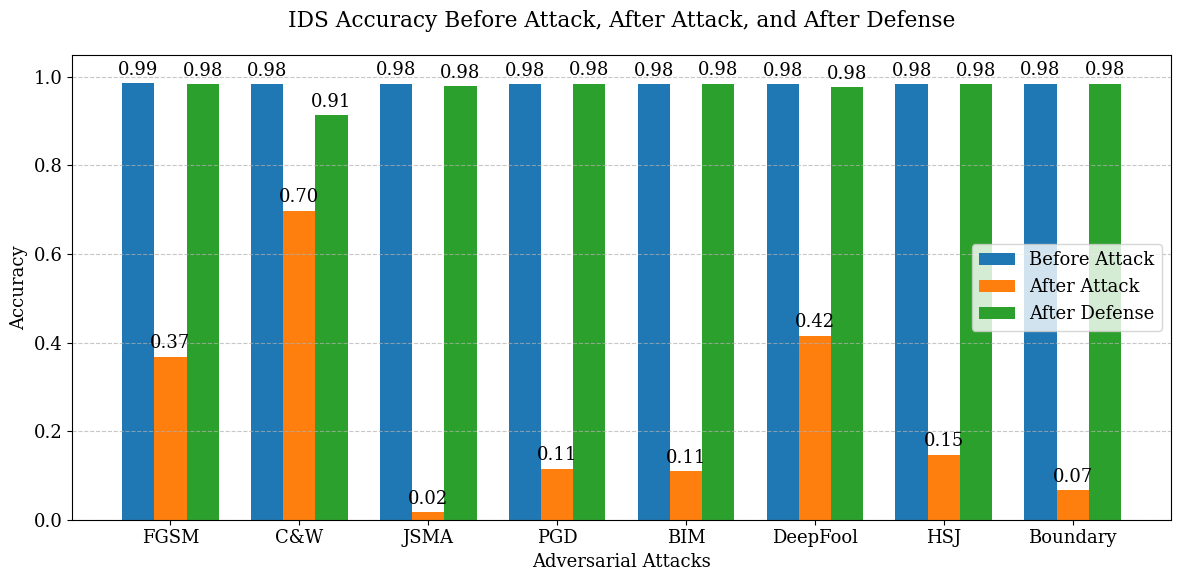

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_before_attack_fgsm = accuracy_score(y_fgsm, y_pred_fgsm)
accuracy_after_attack_fgsm = accuracy_score(y_fgsm, y_pred_adv_fgsm)
accuracy_before_attack_cw = accuracy_score(y_cw, y_pred_cw)
accuracy_after_attack_cw = accuracy_score(y_cw, y_pred_adv_cw)
accuracy_before_attack_jsma = accuracy_score(y_jsma, y_pred_jsma)
accuracy_after_attack_jsma = accuracy_score(y_jsma, y_pred_adv_jsma)
accuracy_before_attack_pgd = accuracy_score(y_pgd, y_pred_pgd)
accuracy_after_attack_pgd = accuracy_score(y_pgd, y_pred_adv_pgd)
accuracy_before_attack_bim = accuracy_score(y_bim, y_pred_bim)
accuracy_after_attack_bim = accuracy_score(y_bim, y_pred_adv_bim)
accuracy_before_attack_deepfool = accuracy_score(y_deepfool, y_pred_deepfool)
accuracy_after_attack_deepfool = accuracy_score(y_deepfool, y_pred_adv_deepfool)
accuracy_before_attack_hsj = accuracy_score(y_hsj, y_pred_hsj)
accuracy_after_attack_hsj = accuracy_score(y_hsj, y_pred_adv_hsj)
accuracy_before_attack_boundary = accuracy_score(y_boundary, y_pred_boundary)
accuracy_after_attack_boundary = accuracy_score(y_boundary, y_pred_adv_boundary)


import matplotlib.pyplot as plt
import numpy as np

# Names of the attacks
attacks = ['FGSM', 'C&W', 'JSMA', 'PGD', 'BIM', 'DeepFool', 'HSJ', 'Boundary']

# Accuracy before and after attacks
accuracy_before = [
    accuracy_before_attack_fgsm,
    accuracy_before_attack_cw,
    accuracy_before_attack_jsma,
    accuracy_before_attack_pgd,
    accuracy_before_attack_bim,
    accuracy_before_attack_deepfool,
    accuracy_before_attack_hsj,
    accuracy_before_attack_boundary
]

accuracy_after = [
    accuracy_after_attack_fgsm,
    accuracy_after_attack_cw,
    accuracy_after_attack_jsma,
    accuracy_after_attack_pgd,
    accuracy_after_attack_bim,
    accuracy_after_attack_deepfool,
    accuracy_after_attack_hsj,
    accuracy_after_attack_boundary
]

# Bar positions
x = np.arange(len(attacks))
width = 0.35

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 13})

bars1 = plt.bar(x - width/2, accuracy_before, width, label='Before Attack')
bars2 = plt.bar(x + width/2, accuracy_after, width, label='After Attack')

# Add accuracy values above bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

# Labels and formatting
plt.ylabel('Accuracy')
plt.xlabel('Adversarial Attacks')
plt.title('IDS Accuracy Before and After Adversarial Attacks', pad=20)
plt.xticks(x, attacks)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("plot.pdf", format="pdf")

# Show the plot
plt.show()


In [9]:
def get_correctly_benign_classified_indices(y_train, y_pred):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
    return correctly_benign_classified_indices

def get_misclassified_as_benign_due_attack_indices(y_train, y_pred, y_pred_adv):
    attack_indices = y_train[y_train['ATTACK'] == 1].index
    attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
    misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
    return misclassified_as_benign_due_attack_indices

def get_correctly_malicious_classified_indices(y_train, y_pred):
    malicious_indices = y_train[y_train['ATTACK'] == 1].index
    malicious_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    correctly_malicious_classified_indices = malicious_indices.intersection(malicious_adv_predicted_indices)
    return correctly_malicious_classified_indices

def get_misclassified_as_malicious_due_attack_indices(y_train, y_pred, y_pred_adv):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    attack_predicted_adversarial_indices = y_pred_adv[y_pred_adv['ATTACK'] == 1].index
    misclassified_as_malicious_due_attack_indices = benign_indices.intersection(benign_adv_predicted_indices).intersection(attack_predicted_adversarial_indices)
    return misclassified_as_malicious_due_attack_indices

In [10]:
y_pred_normal = y_pred.loc[X_normal.index]
correctly_benign_classified_indices = get_correctly_benign_classified_indices(y_normal, y_pred_normal)
misclassified_as_benign_indices = get_misclassified_as_benign_due_attack_indices(y_normal, y_normal, y_pred_normal)
correctly_malicious_classified_indices = get_correctly_malicious_classified_indices(y_normal, y_pred_normal)
misclassified_as_malicious_due_attack_indices = get_misclassified_as_malicious_due_attack_indices(y_normal, y_normal, y_pred_normal)
print(f"------ Normal Data ------")
print(f"{len(correctly_benign_classified_indices)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_indices)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices) + len(misclassified_as_benign_indices) + len(correctly_malicious_classified_indices) + len(misclassified_as_malicious_due_attack_indices)}")

correctly_benign_classified_indices_fgsm = get_correctly_benign_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_benign_due_attack_indices_fgsm = get_misclassified_as_benign_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)
correctly_malicious_classified_indices_fgsm = get_correctly_malicious_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_malicious_due_attack_indices_fgsm = get_misclassified_as_malicious_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)
print(f"------ FGSM Data ------")
print(f"{len(correctly_benign_classified_indices_fgsm)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_fgsm)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_fgsm)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_fgsm)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_fgsm) + len(misclassified_as_benign_due_attack_indices_fgsm) + len(correctly_malicious_classified_indices_fgsm) + len(misclassified_as_malicious_due_attack_indices_fgsm)}")

correctly_benign_classified_indices_cw = get_correctly_benign_classified_indices(y_cw, y_pred_adv_cw)
misclassified_as_benign_due_attack_indices_cw = get_misclassified_as_benign_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)
correctly_malicious_classified_indices_cw = get_correctly_malicious_classified_indices(y_cw, y_pred_adv_cw)
misclassified_as_malicious_due_attack_indices_cw = get_misclassified_as_malicious_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)
print(f"------ CW Data ------")
print(f"{len(correctly_benign_classified_indices_cw)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_cw)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_cw)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_cw)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_cw) + len(misclassified_as_benign_due_attack_indices_cw) + len(correctly_malicious_classified_indices_cw) + len(misclassified_as_malicious_due_attack_indices_cw)}")

correctly_benign_classified_indices_jsma = get_correctly_benign_classified_indices(y_jsma, y_pred_adv_jsma)
misclassified_as_benign_due_attack_indices_jsma = get_misclassified_as_benign_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)
correctly_malicious_classified_indices_jsma = get_correctly_malicious_classified_indices(y_jsma, y_pred_adv_jsma)
misclassified_as_malicious_due_attack_indices_jsma = get_misclassified_as_malicious_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)
print(f"------ JSMA Data ------")
print(f"{len(correctly_benign_classified_indices_jsma)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_jsma)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_jsma)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_jsma)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_jsma) + len(misclassified_as_benign_due_attack_indices_jsma) + len(correctly_malicious_classified_indices_jsma) + len(misclassified_as_malicious_due_attack_indices_jsma)}")

correctly_benign_classified_indices_pgd = get_correctly_benign_classified_indices(y_pgd, y_pred_adv_pgd)
misclassified_as_benign_due_attack_indices_pgd = get_misclassified_as_benign_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)
correctly_malicious_classified_indices_pgd = get_correctly_malicious_classified_indices(y_pgd, y_pred_adv_pgd)
misclassified_as_malicious_due_attack_indices_pgd = get_misclassified_as_malicious_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)
print(f"------ PGD Data ------")
print(f"{len(correctly_benign_classified_indices_pgd)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_pgd)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_pgd)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_pgd)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_pgd) + len(misclassified_as_benign_due_attack_indices_pgd) + len(correctly_malicious_classified_indices_pgd) + len(misclassified_as_malicious_due_attack_indices_pgd)}")

correctly_benign_classified_indices_deepfool = get_correctly_benign_classified_indices(y_deepfool, y_pred_adv_deepfool)
misclassified_as_benign_due_attack_indices_deepfool = get_misclassified_as_benign_due_attack_indices(y_deepfool, y_pred_deepfool, y_pred_adv_deepfool)
correctly_malicious_classified_indices_deepfool = get_correctly_malicious_classified_indices(y_deepfool, y_pred_adv_deepfool)
misclassified_as_malicious_due_attack_indices_deepfool = get_misclassified_as_malicious_due_attack_indices(y_deepfool, y_pred_deepfool, y_pred_adv_deepfool)
print(f"------ DeepFool Data ------")
print(f"{len(correctly_benign_classified_indices_deepfool)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_deepfool)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_deepfool)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_deepfool)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_deepfool) + len(misclassified_as_benign_due_attack_indices_deepfool) + len(correctly_malicious_classified_indices_deepfool) + len(misclassified_as_malicious_due_attack_indices_deepfool)}")

correctly_benign_classified_indices_bim = get_correctly_benign_classified_indices(y_bim, y_pred_adv_bim)
misclassified_as_benign_due_attack_indices_bim = get_misclassified_as_benign_due_attack_indices(y_bim, y_pred_bim, y_pred_adv_bim)
correctly_malicious_classified_indices_bim = get_correctly_malicious_classified_indices(y_bim, y_pred_adv_bim)
misclassified_as_malicious_due_attack_indices_bim = get_misclassified_as_malicious_due_attack_indices(y_bim, y_pred_bim, y_pred_adv_bim)
print(f"------ BIM Data ------")
print(f"{len(correctly_benign_classified_indices_bim)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_bim)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_bim)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_bim)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_bim) + len(misclassified_as_benign_due_attack_indices_bim) + len(correctly_malicious_classified_indices_bim) + len(misclassified_as_malicious_due_attack_indices_bim)}")

correctly_benign_classified_indices_boundary = get_correctly_benign_classified_indices(y_boundary, y_pred_adv_boundary)
misclassified_as_benign_due_attack_indices_boundary = get_misclassified_as_benign_due_attack_indices(y_boundary, y_pred_boundary, y_pred_adv_boundary)
correctly_malicious_classified_indices_boundary = get_correctly_malicious_classified_indices(y_boundary, y_pred_adv_boundary)
misclassified_as_malicious_due_attack_indices_boundary = get_misclassified_as_malicious_due_attack_indices(y_boundary, y_pred_boundary, y_pred_adv_boundary)
print(f"------ Boundary Data ------")
print(f"{len(correctly_benign_classified_indices_boundary)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_boundary)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_boundary)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_boundary)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_boundary) + len(misclassified_as_benign_due_attack_indices_boundary) + len(correctly_malicious_classified_indices_boundary) + len(misclassified_as_malicious_due_attack_indices_boundary)}")

correctly_benign_classified_indices_hsj = get_correctly_benign_classified_indices(y_hsj, y_pred_adv_hsj)
misclassified_as_benign_due_attack_indices_hsj = get_misclassified_as_benign_due_attack_indices(y_hsj, y_pred_hsj, y_pred_adv_hsj)
correctly_malicious_classified_indices_hsj = get_correctly_malicious_classified_indices(y_hsj, y_pred_adv_hsj)
misclassified_as_malicious_due_attack_indices_hsj = get_misclassified_as_malicious_due_attack_indices(y_hsj, y_pred_hsj, y_pred_adv_hsj)
print(f"------ HSJ Data ------")
print(f"{len(correctly_benign_classified_indices_hsj)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_hsj)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_hsj)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_hsj)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_hsj) + len(misclassified_as_benign_due_attack_indices_hsj) + len(correctly_malicious_classified_indices_hsj) + len(misclassified_as_malicious_due_attack_indices_hsj)}")

------ Normal Data ------
58139 | Correctly classified as BENIGN from the IDS
166 | ATTACK sample misclassified as BENIGN from the IDS
60018 | Correctly classified as ATTACK from the IDS
1677 | BENIGN sample misclassified as ATTACK from the IDS
Sum: 120000
------ FGSM Data ------
5386 | Correctly classified as BENIGN from the IDS
7433 | ATTACK sample misclassified as BENIGN from the IDS
133 | Correctly classified as ATTACK from the IDS
2032 | BENIGN sample misclassified as ATTACK from the IDS
Sum: 14984
------ CW Data ------
6527 | Correctly classified as BENIGN from the IDS
3467 | ATTACK sample misclassified as BENIGN from the IDS
3947 | Correctly classified as ATTACK from the IDS
981 | BENIGN sample misclassified as ATTACK from the IDS
Sum: 14922
------ JSMA Data ------
223 | Correctly classified as BENIGN from the IDS
7351 | ATTACK sample misclassified as BENIGN from the IDS
24 | Correctly classified as ATTACK from the IDS
7402 | BENIGN sample misclassified as ATTACK from the IDS
Su

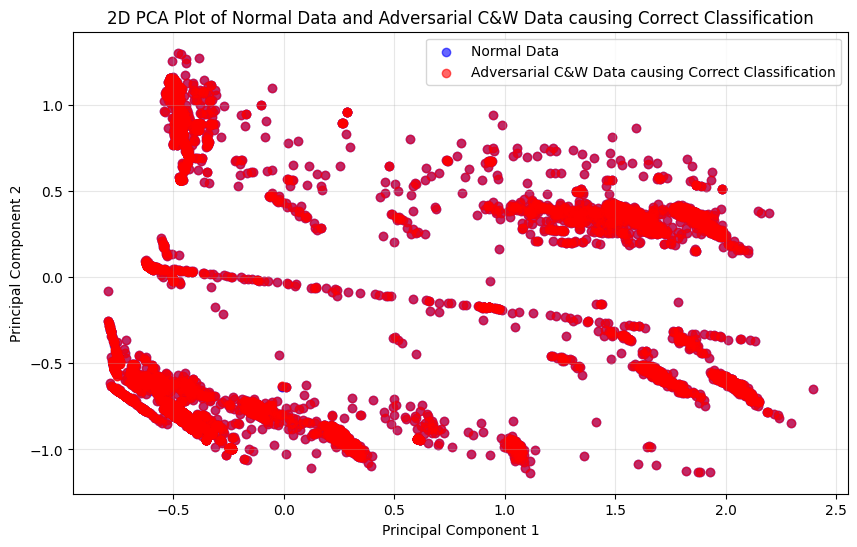

In [12]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

combined_misclassified_indices_cw = np.concatenate([misclassified_as_benign_due_attack_indices_cw, misclassified_as_malicious_due_attack_indices_cw])
combined_correctly_classified_indices_cw = np.concatenate([correctly_benign_classified_indices_cw, correctly_malicious_classified_indices_cw])
# visualizer.visualize_data_distribution(X_cw.loc[combined_misclassified_indices_cw], 'Normal Data', X_adv_cw.loc[combined_misclassified_indices_cw], 'Adversarial C&W Data causing Misclassification')
visualizer.visualize_data_distribution(X_cw.loc[combined_correctly_classified_indices_cw], 'Normal Data', X_adv_cw.loc[combined_correctly_classified_indices_cw], 'Adversarial C&W Data causing Correct Classification')

## Explainer

In [ ]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

# shap_values_df = exp.generate_shap_values(explainer, X_normal)
# print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

# shap_values_adv_df_fgsm = exp.generate_shap_values(explainer, X_adv_fgsm)
# print(f"Generate FGSM Adversarial Explanations | Indices: {shap_values_adv_df_fgsm.index[:5]}... | Shape: {shap_values_adv_df_fgsm.shape}")

# shap_values_adv_df_cw = exp.generate_shap_values(explainer, X_adv_cw)
# print(f"Generate CW Adversarial Explanations | Indices: {shap_values_adv_df_cw.index[:5]}... | Shape: {shap_values_adv_df_cw.shape}")

# shap_values_adv_df_jsma = exp.generate_shap_values(explainer, X_adv_jsma)
# print(f"Generate JSMA Adversarial Explanations | Indices: {shap_values_adv_df_jsma.index[:5]}... | Shape: {shap_values_adv_df_jsma.shape}")

# shap_values_adv_df_pgd = exp.generate_shap_values(explainer, X_adv_pgd)
# print(f"Generate PGD Adversarial Explanations | Indices: {shap_values_adv_df_pgd.index[:5]}... | Shape: {shap_values_adv_df_pgd.shape}")

# shap_values_adv_df_bim = exp.generate_shap_values(explainer, X_adv_bim)
# print(f"Generate BIM Adversarial Explanations | Indices: {shap_values_adv_df_bim.index[:5]}... | Shape: {shap_values_adv_df_bim.shape}")

# shap_values_adv_df_deepfool = exp.generate_shap_values(explainer, X_adv_deepfool)
# print(f"Generate DeepFool Adversarial Explanations | Indices: {shap_values_adv_df_deepfool.index[:5]}... | Shape: {shap_values_adv_df_deepfool.shape}")

# shap_values_adv_df_boundary = exp.generate_shap_values(explainer, X_adv_boundary)
# print(f"Generate Boundary Adversarial Explanations | Indices: {shap_values_adv_df_boundary.index[:5]}... | Shape: {shap_values_adv_df_boundary.shape}")

# shap_values_adv_df_hsj = exp.generate_shap_values(explainer, X_adv_hsj)
# print(f"Generate HSJ Adversarial Explanations | Indices: {shap_values_adv_df_hsj.index[:5]}... | Shape: {shap_values_adv_df_hsj.shape}")

PermutationExplainer explainer: 15001it [08:32, 28.79it/s]                           


Generate FGSM Adversarial Explanations | Indices: Index([1247774, 2756513, 348258, 1153280, 1877447], dtype='int64')... | Shape: (15000, 70)


In [ ]:
# # store shap values
# shap_values_df.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values.csv", index=True)
# shap_values_adv_df_fgsm.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_fgsm.csv", index=True)
# shap_values_adv_df_cw.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_cw.csv", index=True)
# shap_values_adv_df_jsma.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_jsma.csv", index=True)
# shap_values_adv_df_pgd.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_pgd.csv", index=True)
# shap_values_adv_df_bim.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_bim.csv", index=True)
# shap_values_adv_df_deepfool.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_deepfool.csv", index=True)
# shap_values_adv_df_boundary.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_boundary.csv", index=True)
# shap_values_adv_df_hsj.to_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_hsj.csv", index=True)

In [14]:
# load shap values
import pandas as pd
shap_values_df = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values.csv", index_col=0)
shap_values_adv_df_fgsm = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_fgsm.csv", index_col=0)
shap_values_adv_df_cw = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_cw.csv", index_col=0)
shap_values_adv_df_jsma = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_jsma.csv", index_col=0)
shap_values_adv_df_pgd = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_pgd.csv", index_col=0)
shap_values_adv_df_bim = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_bim.csv", index_col=0)
shap_values_adv_df_deepfool = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_deepfool.csv", index_col=0)
shap_values_adv_df_boundary = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_boundary.csv", index_col=0)
shap_values_adv_df_hsj = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_hsj.csv", index_col=0)
import functions.explainer as exp
import importlib
importlib.reload(exp)
explainer = exp.generate_shap_explainer(ids_model, X_train)

[ 187616 1126946 1288635 ... 1837599 2810927  984583]
(4448, 70)


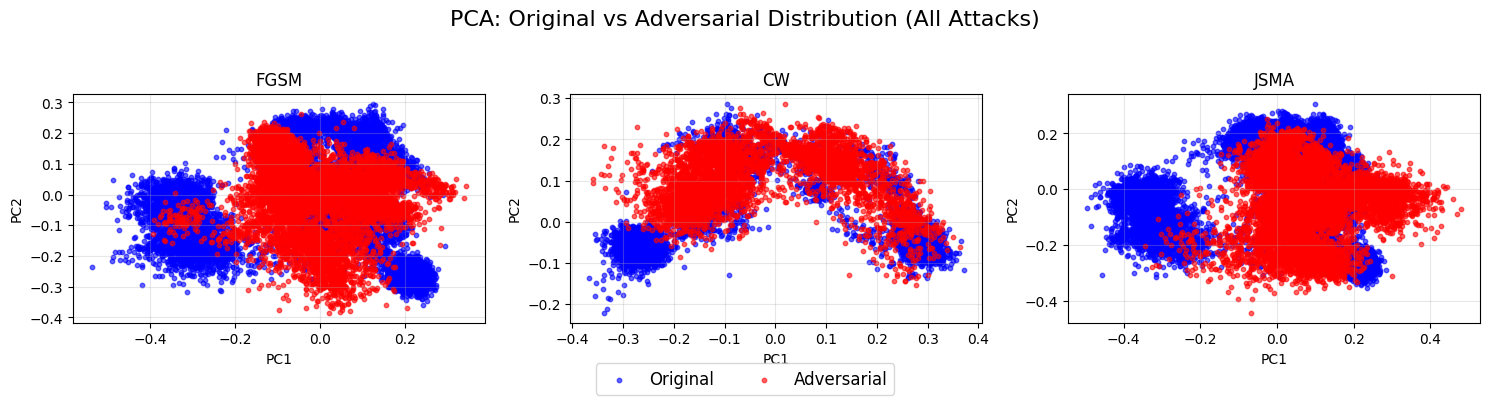

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math

def visualize_all_attacks_pca(original_adv_pairs, titles):
    """
    Visualizes PCA projections of original vs adversarial data for multiple attacks in a 2x4 subplot.

    Args:
        original_adv_pairs (list of tuples): Each tuple is (original_data, adversarial_data)
        titles (list of str): Titles or attack names for each subplot

    Returns:
        None
    """
    n_attacks = len(original_adv_pairs)
    assert n_attacks == len(titles), "Mismatch in data and titles"

    # Determine grid size (up to 4 columns for nice horizontal layout)
    n_cols = min(4, n_attacks)
    n_rows = math.ceil(n_attacks / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = np.array(axes).reshape(-1)  # Flatten in case it's 2D

    for idx, ((data, adv_data), title) in enumerate(zip(original_adv_pairs, titles)):
        # Fit PCA on original data and transform both
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(data)
        adv_pca = pca.transform(adv_data)

        ax = axes[idx]
        ax.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6, label='Original', color='blue', s=10)
        ax.scatter(adv_pca[:, 0], adv_pca[:, 1], alpha=0.6, label='Adversarial', color='red', s=10)
        ax.set_title(title)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.grid(alpha=0.3)

    # Single legend and layout
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large')
    fig.suptitle("PCA: Original vs Adversarial Distribution (All Attacks)", fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # leave space for title & legend
    plt.show()

shap_values_df_fgsm = exp.generate_shap_values(explainer, X_fgsm)
shap_values_df_cw = exp.generate_shap_values(explainer, X_cw)
shap_values_df_jsma = exp.generate_shap_values(explainer, X_jsma)

# List of (original, adversarial) pairs for each attack
original_adv_pairs = [
    (shap_values_df_fgsm, shap_values_adv_df_fgsm),
    (shap_values_df_cw.loc[combined_misclassified_indices_cw], shap_values_adv_df_cw.loc[combined_misclassified_indices_cw]),
    (shap_values_df_jsma, shap_values_adv_df_jsma),
    # (X_pgd, X_adv_pgd),
    # (X_bim, X_adv_bim),
    # (X_deepfool, X_adv_deepfool),
    # (X_hsj, X_adv_hsj),
    # (X_boundary, X_adv_boundary),
]

# Corresponding attack names for titles
attack_titles = ['FGSM', 'CW', 'JSMA']#, 'PGD', 'BIM', 'DeepFool', 'HSJ', 'Boundary']

# Generate the plot
visualize_all_attacks_pca(original_adv_pairs, attack_titles)



In [ ]:
# import functions.visualizer as visualizer
# import importlib
# importlib.reload(visualizer)

# visualizer.visualize_data_distribution(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 'Adversarial Explanations')

In [ ]:
# exp.plot_shap_summary_comparison(shap_values_df.loc[correctly_benign_classified_indices].values, X_train.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices].values, X_adv.loc[misclassified_as_benign_due_attack_indices], 6, title='Normal vs Adversarial Explanations of Benign Samples')

In [15]:
import pandas as pd
adv_concat_correctly_benign_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_benign_classified_indices_fgsm],
    shap_values_adv_df_pgd.loc[correctly_benign_classified_indices_pgd],
    shap_values_adv_df_cw.loc[correctly_benign_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_benign_classified_indices_jsma],
    shap_values_adv_df_deepfool.loc[correctly_benign_classified_indices_deepfool],
    shap_values_adv_df_bim.loc[correctly_benign_classified_indices_bim],
    shap_values_adv_df_boundary.loc[correctly_benign_classified_indices_boundary],
    shap_values_adv_df_hsj.loc[correctly_benign_classified_indices_hsj],

    shap_values_adv_df_fgsm.loc[misclassified_as_malicious_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_malicious_due_attack_indices_pgd],
    shap_values_adv_df_cw.loc[misclassified_as_malicious_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_malicious_due_attack_indices_jsma],
    shap_values_adv_df_deepfool.loc[misclassified_as_malicious_due_attack_indices_deepfool],
    shap_values_adv_df_bim.loc[misclassified_as_malicious_due_attack_indices_bim],
    shap_values_adv_df_boundary.loc[misclassified_as_malicious_due_attack_indices_boundary],
    shap_values_adv_df_hsj.loc[misclassified_as_malicious_due_attack_indices_hsj],
    ], axis=0)

adv_concat_correctly_malicious_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_malicious_classified_indices_fgsm], 
    shap_values_adv_df_pgd.loc[correctly_malicious_classified_indices_pgd],
    shap_values_adv_df_cw.loc[correctly_malicious_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_malicious_classified_indices_jsma],
    shap_values_adv_df_deepfool.loc[correctly_malicious_classified_indices_deepfool],
    shap_values_adv_df_bim.loc[correctly_malicious_classified_indices_bim],
    shap_values_adv_df_boundary.loc[correctly_malicious_classified_indices_boundary],
    shap_values_adv_df_hsj.loc[correctly_malicious_classified_indices_hsj],

    shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
    shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_benign_due_attack_indices_jsma],
    shap_values_adv_df_deepfool.loc[misclassified_as_benign_due_attack_indices_deepfool],
    shap_values_adv_df_bim.loc[misclassified_as_benign_due_attack_indices_bim],
    shap_values_adv_df_boundary.loc[misclassified_as_benign_due_attack_indices_boundary],
    shap_values_adv_df_hsj.loc[misclassified_as_benign_due_attack_indices_hsj],
    ], axis=0)

concat_correct_benign_shaps = pd.concat([
    shap_values_df.loc[correctly_benign_classified_indices], 
    ], axis=0)

concat_correct_malicious_shaps = pd.concat([
    shap_values_df.loc[correctly_malicious_classified_indices],
    ], axis=0)

print(f" ADV Correctly BENIGN : {adv_concat_correctly_benign_classified_shaps.shape} | ADV Correctly ATTACK: {adv_concat_correctly_malicious_classified_shaps.shape} | BENIGN: {concat_correct_benign_shaps.shape} | ATTACK: {concat_correct_malicious_shaps.shape}")

 ADV Correctly BENIGN : (60034, 70) | ADV Correctly ATTACK: (59784, 70) | BENIGN: (58139, 70) | ATTACK: (60018, 70)


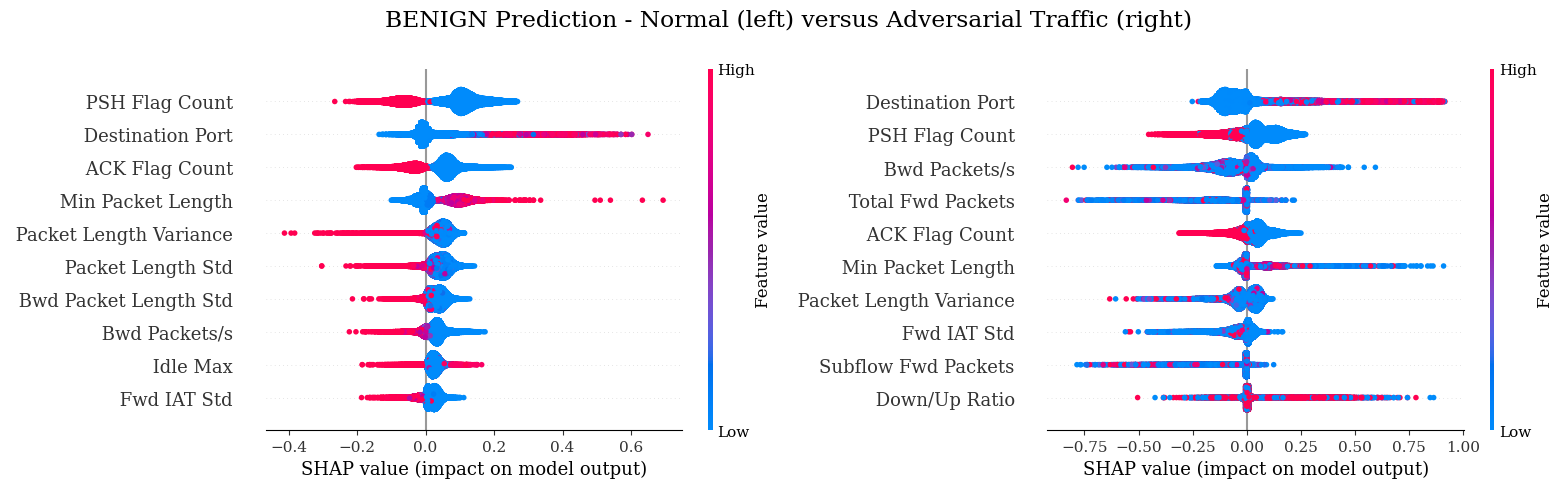

In [28]:
importlib.reload(exp)
exp.plot_shap_summary_comparison(concat_correct_benign_shaps.values, X_train.loc[concat_correct_benign_shaps.index], adv_concat_correctly_benign_classified_shaps.values, X_train.loc[adv_concat_correctly_benign_classified_shaps.index], title='BENIGN Prediction - Normal (left) versus Adversarial Traffic (right)' )

## Detector

In [16]:
import functions.detector as det
import importlib
importlib.reload(det)

# create dataframe
class_samples = {
    'ADVERSARIAL MALICIOUS': adv_concat_correctly_malicious_classified_shaps,
    'ADVERSARIAL BENIGN': adv_concat_correctly_benign_classified_shaps,
    'BENIGN': concat_correct_benign_shaps, 
    'MALICIOUS': concat_correct_malicious_shaps,
}
X, y = det.build_detector_dataset(class_samples)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det, plot_train_performance=False)

# store detector
# det.store(detector, 'sigma')

Class 'ADVERSARIAL MALICIOUS' has 59784 samples.
Class 'ADVERSARIAL BENIGN' has 60034 samples.
Class 'BENIGN' has 58139 samples.
Class 'MALICIOUS' has 60018 samples.
Generated dataset: X shape (237975, 70), y shape (237975, 4)
Epoch 1/20


2025-07-12 16:20:40.772194: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


4261/4284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8170 - loss: 0.5570

2025-07-12 16:20:46.596386: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


4284/4284 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8173 - loss: 0.5562 - val_accuracy: 0.9116 - val_loss: 0.2792
Epoch 2/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9046 - loss: 0.3084 - val_accuracy: 0.9153 - val_loss: 0.2639
Epoch 3/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9071 - loss: 0.2892 - val_accuracy: 0.9171 - val_loss: 0.2557
Epoch 4/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9093 - loss: 0.2803 - val_accuracy: 0.9186 - val_loss: 0.2510
Epoch 5/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9111 - loss: 0.2730 - val_accuracy: 0.9194 - val_loss: 0.2473
Epoch 6/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9118 - loss: 0.2699 - val_accuracy: 0.9199 - val_loss: 0.2476
Epoch 7/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9134 - loss: 0.2652 - val_accuracy: 0.9195 - val_loss: 0.2471
Epoch 8/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9141 - loss: 0.2632 - val_accurac

2025-07-12 16:22:24.216770: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


744/744 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


In [17]:
# Evaluate detector
y_pred_det = det.predict(detector, X_test_det, y.columns)
print(f"Predictions on Detector | Indices: {y_pred_det.index[:5]}... | Shape: {y_pred_det.shape}")

# Convert one-hot to class indices
y_true_indices = np.argmax(y_test_det, axis=1)
y_true_indices_pd = pd.Series(y_true_indices, index=y_test_det.index)
y_pred_indices = np.argmax(y_pred_det, axis=1)
y_pred_indices_pd = pd.Series(y_pred_indices, index=y_pred_det.index)
print(y_true_indices[:5], y_pred_indices[:5])

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute Accuracy
accuracy = accuracy_score(y_true_indices, y_pred_indices)
print(f"Overall Accuracy: {accuracy:.4f}")

# Compute Classification Report for overall classification
print("Classification Report (Overall):")
print(classification_report(y_true_indices, y_pred_indices, target_names=y.columns, zero_division=0, digits=4))

report_expl = classification_report(y_true_indices, y_pred_indices, target_names=y.columns, zero_division=0, digits=4, output_dict=True)

744/744 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
Predictions on Detector | Indices: Index([1178101, 932595, 259152, 957536, 1413966], dtype='int64')... | Shape: (23798, 4)
[0 2 2 2 1] [0 2 2 2 2]
Overall Accuracy: 0.9228
Classification Report (Overall):
                       precision    recall  f1-score   support

ADVERSARIAL MALICIOUS     0.9656    0.8778    0.9196      5851
   ADVERSARIAL BENIGN     0.9933    0.8188    0.8977      6017
               BENIGN     0.8604    0.9954    0.9230      5882
            MALICIOUS     0.9001    0.9992    0.9470      6048

             accuracy                         0.9228     23798
            macro avg     0.9298    0.9228    0.9218     23798
         weighted avg     0.9300    0.9228    0.9219     23798



### Detector on Raw Data

In [31]:
import functions.detector as det
import importlib
importlib.reload(det)
import pandas as pd

adv_concat_correctly_benign_classified_shaps_raw = pd.concat([
    X_adv_fgsm.loc[correctly_benign_classified_indices_fgsm],
    X_adv_pgd.loc[correctly_benign_classified_indices_pgd],
    X_adv_cw.loc[correctly_benign_classified_indices_cw],
    X_adv_jsma.loc[correctly_benign_classified_indices_jsma],
    X_adv_deepfool.loc[correctly_benign_classified_indices_deepfool],
    X_adv_bim.loc[correctly_benign_classified_indices_bim],
    X_adv_boundary.loc[correctly_benign_classified_indices_boundary],
    X_adv_hsj.loc[correctly_benign_classified_indices_hsj],
    X_adv_fgsm.loc[misclassified_as_malicious_due_attack_indices_fgsm], 
    X_adv_pgd.loc[misclassified_as_malicious_due_attack_indices_pgd],
    X_adv_cw.loc[misclassified_as_malicious_due_attack_indices_cw],
    X_adv_jsma.loc[misclassified_as_malicious_due_attack_indices_jsma],
    X_adv_deepfool.loc[misclassified_as_malicious_due_attack_indices_deepfool],
    X_adv_bim.loc[misclassified_as_malicious_due_attack_indices_bim],
    X_adv_boundary.loc[misclassified_as_malicious_due_attack_indices_boundary],
    X_adv_hsj.loc[misclassified_as_malicious_due_attack_indices_hsj],
    ], axis=0)

adv_concat_correctly_malicious_classified_shaps_raw = pd.concat([
    X_adv_fgsm.loc[correctly_malicious_classified_indices_fgsm], 
    X_adv_pgd.loc[correctly_malicious_classified_indices_pgd],
    X_adv_cw.loc[correctly_malicious_classified_indices_cw],
    X_adv_jsma.loc[correctly_malicious_classified_indices_jsma],
    X_adv_deepfool.loc[correctly_malicious_classified_indices_deepfool],
    X_adv_bim.loc[correctly_malicious_classified_indices_bim],
    X_adv_boundary.loc[correctly_malicious_classified_indices_boundary],
    X_adv_hsj.loc[correctly_malicious_classified_indices_hsj],
    X_adv_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
    X_adv_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
    X_adv_cw.loc[misclassified_as_benign_due_attack_indices_cw],
    X_adv_jsma.loc[misclassified_as_benign_due_attack_indices_jsma],
    X_adv_deepfool.loc[misclassified_as_benign_due_attack_indices_deepfool],
    X_adv_bim.loc[misclassified_as_benign_due_attack_indices_bim],
    X_adv_boundary.loc[misclassified_as_benign_due_attack_indices_boundary],
    X_adv_hsj.loc[misclassified_as_benign_due_attack_indices_hsj],
    ], axis=0)

concat_correct_benign_shaps_raw = pd.concat([
    X_normal.loc[correctly_benign_classified_indices], 
    ], axis=0)

concat_correct_attack_shaps_raw = pd.concat([
    X_normal.loc[correctly_malicious_classified_indices],
    ], axis=0)

# create dataframe
class_samples = {
    'ADV CORRECT ATTACK': adv_concat_correctly_malicious_classified_shaps_raw,
    'ADV CORRECT BENIGN': adv_concat_correctly_benign_classified_shaps_raw,
    'CORRECT BENIGN': concat_correct_benign_shaps_raw, 
    'CORRECT ATTACK': concat_correct_attack_shaps_raw,
}
X, y = det.build_detector_dataset(class_samples)
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector_raw = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det, plot_train_performance=False)

# Evaluate detector
y_pred_det = det.predict(detector_raw, X_test_det, y.columns)
print(f"Predictions on Detector | Indices: {y_pred_det.index[:5]}... | Shape: {y_pred_det.shape}")

# Convert one-hot to class indices
y_true_indices = np.argmax(y_test_det, axis=1)
y_true_indices_pd = pd.Series(y_true_indices, index=y_test_det.index)
y_pred_indices = np.argmax(y_pred_det, axis=1)
y_pred_indices_pd = pd.Series(y_pred_indices, index=y_pred_det.index)
print(y_true_indices[:5], y_pred_indices[:5])

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute Accuracy
accuracy = accuracy_score(y_true_indices, y_pred_indices)
print(f"Overall Accuracy: {accuracy:.4f}")

# Compute Classification Report for overall classification
print("Classification Report (Overall):")
report_raw = classification_report(y_true_indices, y_pred_indices, target_names=y.columns, zero_division=0, digits=4, output_dict=True)
print(report_raw)

Class 'ADV CORRECT ATTACK' has 59784 samples.
Class 'ADV CORRECT BENIGN' has 60034 samples.
Class 'CORRECT BENIGN' has 58139 samples.
Class 'CORRECT ATTACK' has 60018 samples.
Generated dataset: X shape (237975, 70), y shape (237975, 4)
(237975, 70) (237975, 4)
(214177, 70) (23798, 70) (214177, 4) (23798, 4)
Epoch 1/20
4262/4284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6821 - loss: 0.7635

2025-07-10 16:34:40.489328: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


4284/4284 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6825 - loss: 0.7626 - val_accuracy: 0.8557 - val_loss: 0.4076
Epoch 2/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8448 - loss: 0.4350 - val_accuracy: 0.8900 - val_loss: 0.3389
Epoch 3/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8715 - loss: 0.3735 - val_accuracy: 0.8943 - val_loss: 0.3059
Epoch 4/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8852 - loss: 0.3406 - val_accuracy: 0.9047 - val_loss: 0.2828
Epoch 5/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8926 - loss: 0.3199 - val_accuracy: 0.9099 - val_loss: 0.2710
Epoch 6/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8956 - loss: 0.3107 - val_accuracy: 0.9095 - val_loss: 0.2674
Epoch 7/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9003 - loss: 0.2995 - val_accuracy: 0.9109 - val_loss: 0.2638
Epoch 8/20
4284/4284 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9016 - loss: 0.2947 - val_accurac

2025-07-10 16:36:21.095046: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


744/744 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
744/744 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
Predictions on Detector | Indices: Index([1178101, 932595, 259152, 957536, 1413966], dtype='int64')... | Shape: (23798, 4)
[0 2 2 2 1] [0 2 2 2 2]
Overall Accuracy: 0.9171
Classification Report (Overall):
{'ADV CORRECT ATTACK': {'precision': 0.9547064305684996, 'recall': 0.8754059135190566, 'f1-score': 0.9133380884450785, 'support': 5851.0}, 'ADV CORRECT BENIGN': {'precision': 0.9971234846928293, 'recall': 0.8065481136779126, 'f1-score': 0.8917677324513047, 'support': 6017.0}, 'CORRECT BENIGN': {'precision': 0.8526007326007325, 'recall': 0.9892893573614416, 'f1-score': 0.9158731407885418, 'support': 5882.0}, 'CORRECT ATTACK': {'precision': 0.8945260347129506, 'recall': 0.9970238095238095, 'f1-score': 0.9429978888106967, 'support': 6048.0}, 'accuracy': 0.9170518530968989, 'macro avg': {'precision': 0.9247391706437531, 'recall': 0.9170667985205552, 'f1-score': 0.9159942126239053, 'support': 23798.0}, 'w

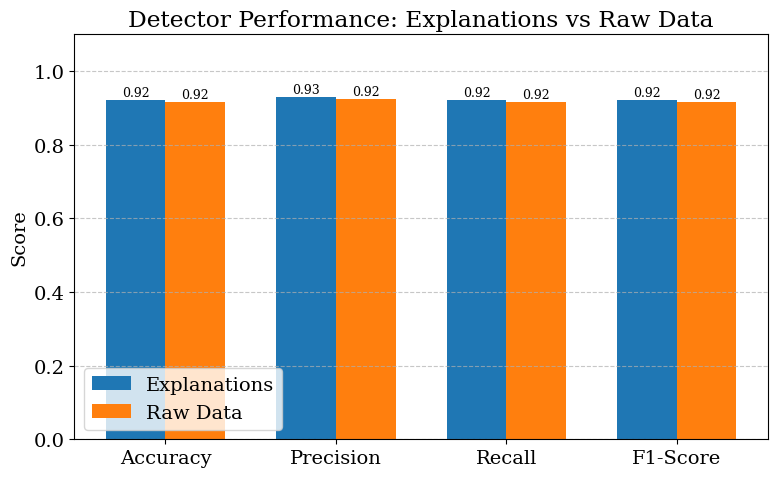

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics
avg_type = 'macro avg'  # or 'macro avg' depending on your needs

metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# Build values from classification reports
explanation_scores = [
    report_expl['accuracy'],
    report_expl[avg_type]['precision'],
    report_expl[avg_type]['recall'],
    report_expl[avg_type]['f1-score']
]

raw_scores = [
    report_raw['accuracy'],
    report_raw[avg_type]['precision'],
    report_raw[avg_type]['recall'],
    report_raw[avg_type]['f1-score']
]

# X positions and width
x = np.arange(len(metrics))
width = 0.35

# Create plot
plt.figure(figsize=(8, 5))
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 14})
plt.bar(x - width/2, explanation_scores, width, label='Explanations')
plt.bar(x + width/2, raw_scores, width, label='Raw Data')

# Add labels on top of bars
for i in range(len(metrics)):
    plt.text(x[i] - width/2, explanation_scores[i] + 0.01, f"{explanation_scores[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + width/2, raw_scores[i] + 0.01, f"{raw_scores[i]:.2f}", ha='center', fontsize=9)

# Format axes and title
plt.xticks(x, ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
plt.ylabel('Score')
plt.title('Detector Performance: Explanations vs Raw Data')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("plot.pdf", format="pdf")
plt.show()


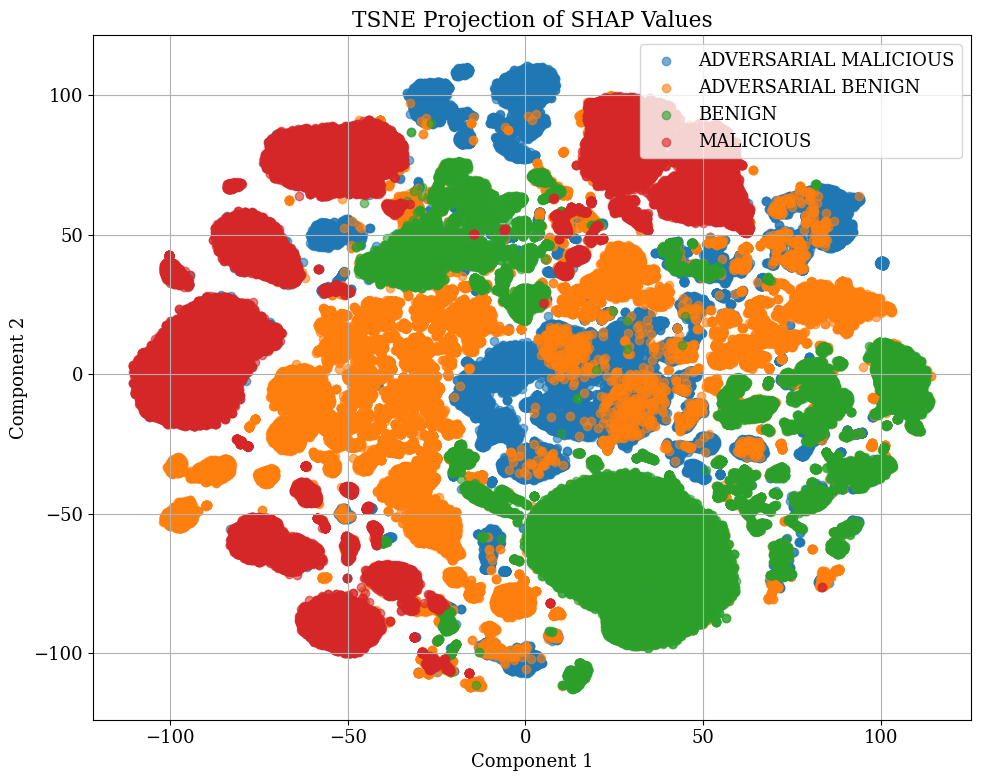

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


def plot_dim_reduction(X, y_onehot, class_labels, method="pca", **kwargs):
    """
    Plots dimensionality-reduced data using PCA, t-SNE, or UMAP.

    Args:
        X (ndarray or DataFrame): Feature matrix.
        y_onehot (ndarray): One-hot encoded labels.
        class_labels (list of str): Class label names.
        method (str): 'pca' or 'tsne'.
        **kwargs: Additional arguments for the reducer (e.g., perplexity for t-SNE).
    """
    y_indices = np.argmax(y_onehot, axis=1)

    if method == "pca":
        reducer = PCA(n_components=2)
    elif method == "tsne":
        reducer = TSNE(n_components=2, random_state=42, **kwargs)
    else:
        raise ValueError("Invalid method. Choose from 'pca' or 'tsne'.")

    X_reduced = reducer.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.rcParams["font.family"] = "serif"
    plt.rcParams.update({'font.size': 13})
    for i, label in enumerate(class_labels):
        idx = y_indices == i
        plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], label=label, alpha=0.6)

    plt.title(f"{method.upper()} Projection of SHAP Values")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("plot.pdf", format="pdf")
    plt.show()

plot_dim_reduction(X, y, class_samples, method="tsne", perplexity=30)
# plot_dim_reduction(X, y, class_samples, method="pca")

---
## Manual Evaluation on unseen Data
We perform the whole two-stages approach on new unseen data and evaluate the following tasks:
- Robust Classification
- Adversarial Detection
- Attack Mitigation

In [16]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# dataset
# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=1000, random_sample_state=1503)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

benign_eval = y_eval[y_eval['BENIGN'] == 1].index
malicious_eval = y_eval[y_eval['ATTACK'] == 1].index
eval_samples = y_eval.index

-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Sampling balanced data ---
Sample to shape: (2000, 70)
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([2031896, 337727, 777217, 2756525, 1427679], dtype='int64')... | Shape: (2000, 70)
Generate Labels | Indices: Index([2031896, 337727, 777217, 2756525, 1427679], dtype='int64')... | Shape: (2000, 2)
BENIGN  ATTACK
False   True      1000
True    False     1000
Name: count, dtype: int64


### Just for Import

In [17]:
import functions.detector as det
import functions.explainer as exp
import functions.attack_generator as ag
importlib.reload(det)
import numpy as np
detector = det.load('sigma')

explainer = exp.generate_shap_explainer(ids_model, X_train)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

import multiprocessing
num_cores = multiprocessing.cpu_count()

### Normal IDS Prediction

In [18]:
y_pred_norm = ids.predict(ids_model, X_eval, y_eval.columns)
ids.evaluate_model(y_pred_norm, y_eval)

 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
Global Accuracy: 98.50%
              precision    recall  f1-score   support

      ATTACK     0.9727    0.9980    0.9852      1000
      BENIGN     0.9979    0.9720    0.9848      1000

    accuracy                         0.9850      2000
   macro avg     0.9853    0.9850    0.9850      2000
weighted avg     0.9853    0.9850    0.9850      2000



### Adversarial Attack

In [143]:
importlib.reload(ag)

import multiprocessing
num_cores = multiprocessing.cpu_count()
X_adv_eval = ag.generate_fgsm_attacks(art_model, X_eval) #feature_mask=feature_mask
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Adversarial FGSM examples generated. Shape: (2000, 70)
Create Adversarial Attack | Indices: Index([2031896, 337727, 777217, 2756525, 1427679], dtype='int64')... | Shape: (2000, 70)
Accuracy: 37.80%
              precision    recall  f1-score   support

      ATTACK     0.0612    0.0170    0.0266      1000
      BENIGN     0.4292    0.7390    0.5430      1000

    accuracy                         0.3780      2000
   macro avg     0.2452    0.3780    0.2848      2000
weighted avg     0.2452    0.3780    0.2848      2000

Confusion Matrix: Positive == BENIGN
TN: 17, FP: 983, FN: 261, TP: 739
Predictions on Adversarial Attacks | Indices: Index([2031896, 337727, 777217, 2756525, 1427679], dtype='int64')... | Shape: (2000, 2)


In [144]:
importlib.reload(exp)
X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 2001it [01:02, 26.76it/s]                          


Create Explanations | Indices: Index([2031896, 337727, 777217, 2756525, 1427679], dtype='int64')... | Shape: (2000, 70)


### Clean Data

In [145]:
# # normal shap values
# y_pred_adv_eval = ag.evaluate_art_model(art_model, X_eval, y_eval)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

# X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_eval)

# print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

### Run Detector

In [146]:
importlib.reload(det)
# Predict on detector
columns = ['ADV CORRECT ATTACK', 'ADV CORRECT BENIGN', 'CORRECT BENIGN', 'CORRECT ATTACK']
y_pred_eval_detector = det.predict(detector, X_eval_adv_shap_values_df, columns)

benign_pred_ids = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
malicious_pred_ids = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

adv_benign_pred_det = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT BENIGN'] == 1].index 
adv_malicious_pred_det = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT ATTACK'] == 1].index
malicious_pred_det = y_pred_eval_detector[y_pred_eval_detector['CORRECT ATTACK'] == 1].index
benign_pred_det = y_pred_eval_detector[y_pred_eval_detector['CORRECT BENIGN'] == 1].index
print(f"Predicted Class ADV BENIGN: {len(adv_benign_pred_det)}")
print(f"Predicted Class ADV MALICIOUS: {len(adv_malicious_pred_det)}")
print(f"Predicted Class BENIGN: {len(benign_pred_det)}")
print(f"Predicted Class MALICIOUS: {len(malicious_pred_det)}")
print("All Predicted Classes: ", len(adv_benign_pred_det) + len(adv_malicious_pred_det) + len(malicious_pred_det) + len(benign_pred_det))

 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

2025-07-04 15:24:33.616904: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
Predicted Class ADV BENIGN: 964
Predicted Class ADV MALICIOUS: 1015
Predicted Class BENIGN: 7
Predicted Class MALICIOUS: 14
All Predicted Classes:  2000


### Classification (Accuracy, Precision, Recall, F1-Score)

In [147]:
# combine both benign and both malicious classes into single class
benign_pred_concat = np.concatenate((adv_benign_pred_det, benign_pred_det))
malicious_pred_concat = np.concatenate((adv_malicious_pred_det, malicious_pred_det))

# After Detector Stage
TP = len(benign_eval.intersection(benign_pred_concat)) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"TP: {TP} - Detector classifies 'BENIGN' samples as correct 'BENIGN'")
FP = len(malicious_eval.intersection(benign_pred_concat)) # Detector classifies 'ATTACK' samples as correct 'BENIGN'
print(f"FP: {FP} - Detector mis-classifies 'ATTACK' samples as correct 'BENIGN'")
TN = len(malicious_eval.intersection(malicious_pred_concat)) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
print(f"TN: {TN} - Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'")
FN = len(benign_eval.intersection(malicious_pred_concat)) # Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK'
print(f"FN: {FN} - Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK")
print(f"Sum: {TP + FP + TN + FN}")

from sklearn.metrics import classification_report

print(f"Global Accuracy: {(TP + TN) / (TP + FP + TN + FN) * 100:.2f}%")

# Construct a fake y_true and y_pred to match sklearn's classification_report format
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)  # True labels
y_pred = np.array([1] * TP + [0] * TN + [0] * FN + [1] * FP)  # Predicted labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['ATTACK', 'BENIGN'], digits=4) # reverse labels because classification_report assumes first label is 0
print(report)

print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
print(f"False Positive Rate: {FP/(TN+FP)*100:.2f}%")
print(f"True Positive Rate: {TP/(TP+FN)*100:.2f}%")
print(f"False Negative Rate: {FN/(TP+FN)*100:.2f}%")

TP: 957 - Detector classifies 'BENIGN' samples as correct 'BENIGN'
FP: 14 - Detector mis-classifies 'ATTACK' samples as correct 'BENIGN'
TN: 986 - Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
FN: 43 - Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK
Sum: 2000
Global Accuracy: 97.15%
              precision    recall  f1-score   support

      ATTACK     0.9582    0.9860    0.9719      1000
      BENIGN     0.9856    0.9570    0.9711      1000

    accuracy                         0.9715      2000
   macro avg     0.9719    0.9715    0.9715      2000
weighted avg     0.9719    0.9715    0.9715      2000

True Negative Rate: 98.60%
False Positive Rate: 1.40%
True Positive Rate: 95.70%
False Negative Rate: 4.30%


### Detection Rate (DR) / Effective Detection Rate (EDR)

$ \text{DR} = \frac{\text{Detected}}{\text{Adversarial Samples}} \hspace{1.3cm} \text{EDR} = \frac{\text{Detected}_{\text{successful}}}{\text{Adversarial Sample}_\text{successful}} $

In [148]:
detected = np.concat((adv_benign_pred_det, adv_malicious_pred_det))

dr = len(detected) / len(eval_samples)
print(f"Detection Rate: {dr:.4f}")

misclassified_benign_ids = benign_eval.intersection(malicious_pred_ids)
misclassified_malicious_ids = malicious_eval.intersection(benign_pred_ids)
misclassified_ids = np.concat((misclassified_benign_ids, misclassified_malicious_ids))
detected_misclassified = np.intersect1d(detected, misclassified_ids)

edr = len(detected_misclassified) / len(misclassified_ids)
print(f"Effective Detection Rate: {edr:.4f}")

Detection Rate: 0.9895
Effective Detection Rate: 0.9992


### Misclassification Rate (MCR)
$ \text{MCR} = \frac{\text{Detected}_{\text{clean}}}{\text{Clean Samples}} $

In [149]:
detected_clean = eval_samples.intersection(detected)
print(len(detected_clean))

mcr = len(detected_clean) / len(eval_samples)
print(f"Misclassification Rate: {mcr:.4f}")

1979
Misclassification Rate: 0.9895


### Attack Mitigation Rate (AMR)
$
\text{AMR} = \frac{\text{Detected} + \text{Correctly Classified}_{\text{undetected}}}{\text{Adversarial Samples}}
$

In [150]:
detected_samples = len(adv_benign_pred_det) + len(adv_malicious_pred_det)
correctly_classified_samples = len(malicious_pred_det.intersection(malicious_eval)) + len(benign_pred_det.intersection(benign_eval))

amr = (detected_samples + correctly_classified_samples) / len(eval_samples)
print(f"Attack Mitigation Rate {amr:.4f}")

Attack Mitigation Rate 0.9995


### Clean Acceptance Rate (CAR)
$
\text{CAR} = \frac{\text{Correctly Classified as Benign/Malicious}}{\text{Clean Samples}}
$

In [151]:
correct_benign = malicious_pred_det.intersection(malicious_eval)
correct_malicious = benign_pred_det.intersection(benign_eval)

ccr = (len(correct_benign) + len(correct_malicious)) / len(eval_samples)
print(f"Clean Classification Rate: {ccr:.4f}")

Clean Classification Rate: 0.0100
